# Image Denoising
Esteban Sierra Baccio

## Setup (imports, seed, GPU check)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling3D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

## Dataset loading & exploration

In [4]:
# Cargar MINST
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Noise generation & visualization

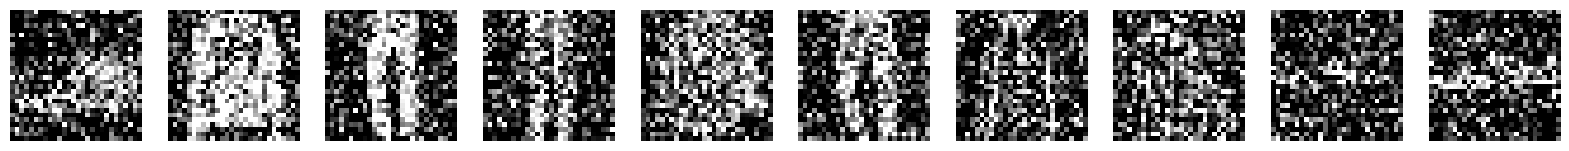

In [9]:
# 1. Definir el nivel de ruido
noise_factor = 0.5 

# 2. Generar ruido Gaussiano
noise_train = np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noise_test = np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 3. Crear imágenes ruidosas y recortar valores (clipping)
x_train_noisy = x_train + noise_factor * noise_train
x_test_noisy = x_test + noise_factor * noise_test

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualizar las imágenes con ruido para verificar
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

## AutoEncoder design (Dense or CNN)

In [6]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
output_img = Reshape((28, 28, 1))(x)

dense_autoencoder = Model(input_img, output_img)
dense_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

dense_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3703 - val_loss: 0.3121
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3026 - val_loss: 0.2987
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2938 - val_loss: 0.2930
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2889 - val_loss: 0.2897
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2858 - val_loss: 0.2865
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2836 - val_loss: 0.2848
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2815 - val_loss: 0.2829
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2801 - val_loss: 0.2817
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2790 - val_loss: 0.2806
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2779 - val_loss: 0.2798


## Training with callbacks (EarlyStopping recommended)

Epoch 1/50
229/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3367

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3147 - val_loss: 0.3030
Epoch 2/50
223/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2990

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2983 - val_loss: 0.2997
Epoch 3/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2960

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2954 - val_loss: 0.2975
Epoch 4/50
224/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2939

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2939 - val_loss: 0.2966
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2929 - val_loss: 0.2980
Epoch 6/50
222/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2927

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2922 - val_loss: 0.2953
Epoch 7/50
229/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2916

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2916 - val_loss: 0.2950
Epoch 8/50
229/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2912

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2912 - val_loss: 0.2947
Epoch 9/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2902

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2909 - val_loss: 0.2944
Epoch 10/50
227/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2905

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2906 - val_loss: 0.2941
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2898

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2903 - val_loss: 0.2940
Epoch 12/50
226/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2900

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2901 - val_loss: 0.2935
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2898 - val_loss: 0.2936
Epoch 14/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2901

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2896 - val_loss: 0.2934
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2895 - val_loss: 0.2937
Epoch 16/50
227/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2887

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2894 - val_loss: 0.2931
Epoch 17/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2891 - val_loss: 0.2931
Epoch 18/50
222/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2891

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2889 - val_loss: 0.2928
Epoch 19/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2889 - val_loss: 0.2929
Epoch 20/50
229/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2886

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2887 - val_loss: 0.2928
Epoch 21/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2888

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2885 - val_loss: 0.2928
Epoch 22/50
229/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2873

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2884 - val_loss: 0.2926
Epoch 23/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2884 - val_loss: 0.2927
Epoch 24/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2876

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2882 - val_loss: 0.2924
Epoch 25/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2880 - val_loss: 0.2930
Epoch 26/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2880 - val_loss: 0.2926
Epoch 27/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2879 - val_loss: 0.2926
Epoch 28/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2876

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2878 - val_loss: 0.2923
Epoch 29/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2877 - val_loss: 0.2924
Epoch 30/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2876 - val_loss: 0.2925
Epoch 31/50
227/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2881

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2876 - val_loss: 0.2921
Epoch 32/50
226/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2877

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2875 - val_loss: 0.2919
Epoch 33/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2874 - val_loss: 0.2922
Epoch 34/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2873 - val_loss: 0.2921
Epoch 35/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2873 - val_loss: 0.2924
Epoch 36/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2873

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2872 - val_loss: 0.2919
Epoch 37/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2868

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2872 - val_loss: 0.2918
Epoch 38/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2870 - val_loss: 0.2921
Epoch 39/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2870 - val_loss: 0.2927
Epoch 40/50
223/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2874

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2870 - val_loss: 0.2917
Epoch 41/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2869 - val_loss: 0.2918
Epoch 42/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2868 - val_loss: 0.2917
Epoch 43/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2869 - val_loss: 0.2920
Epoch 44/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2868 - val_loss: 0.2917
Epoch 45/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2867 - val_loss: 0.2917
Epoch 46/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2866 - val_loss: 0.2917
Epoch 47/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2866 - val_loss: 0.2918
Epoch 48/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2867 - val_loss: 0.2919
Epoch 49/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2861

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2865 - val_loss: 0.2916
Epoch 50/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2864

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2864 - val_loss: 0.2915
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


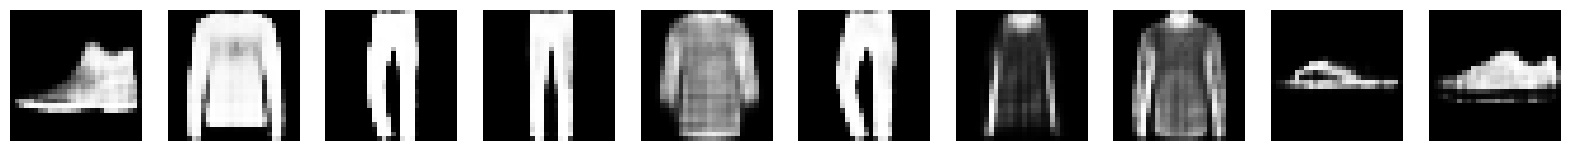

In [10]:
# Training with callbacks to save the best model
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_dense_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min')
dense_autoencoder.fit(x_train_noisy, x_train, 
                      epochs=50, 
                      batch_size=256, 
                      shuffle=True, 
                      validation_data=(x_test_noisy, x_test), 
                      callbacks=[checkpoint])
dense_autoencoder.load_weights('best_dense_autoencoder.h5')
decoded_imgs = dense_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off') 

## Evaluation (MSE, optional PSNR) + visual grid

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3699
Test Loss: 0.3698705732822418
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


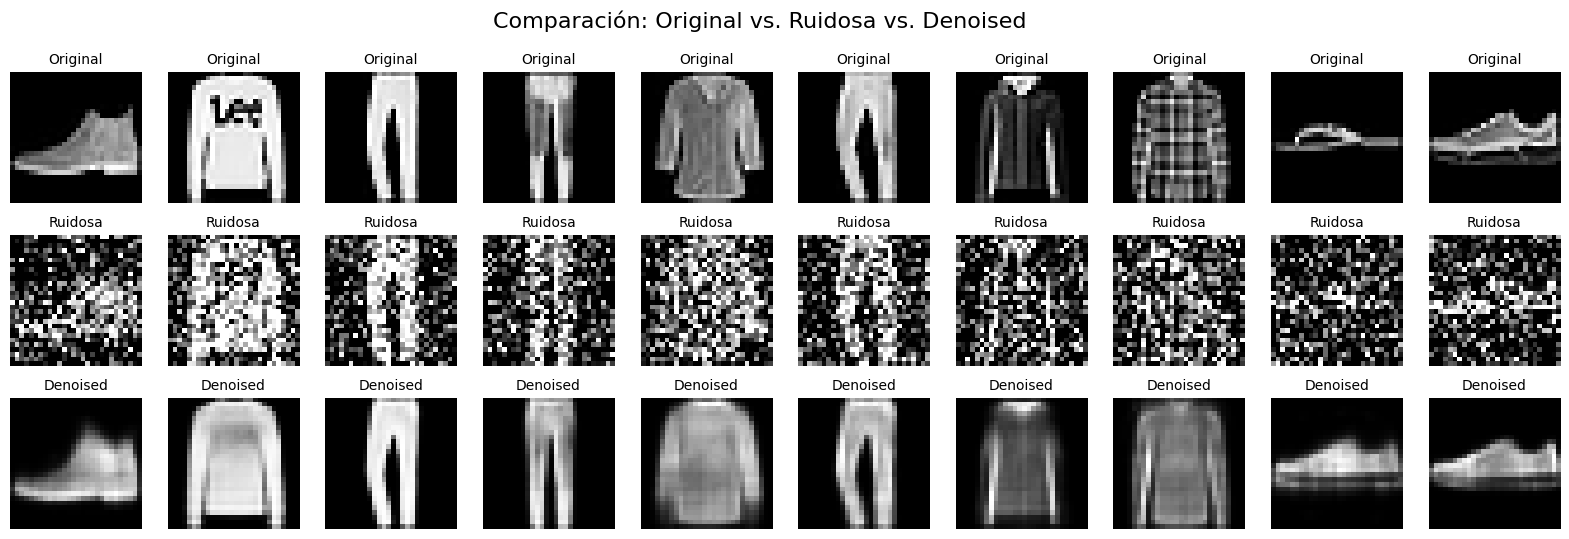

In [13]:
# Evaluate the model with MSE loss
loss = dense_autoencoder.evaluate(x_test, x_test)
print(f'Test Loss: {loss}')

decoded_imgs = dense_autoencoder.predict(x_test_noisy)

# 2. Configurar la visualización
n = 10  # Número de imágenes a mostrar
plt.figure(figsize=(20, 6)) # Aumentamos la altura de la figura a 6 para 3 filas

for i in range(n):
    # Fila 1: Imagen Original (Limpia)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original", fontsize=10)
    plt.axis('off')

    # Fila 2: Imagen con Ruido (Entrada al Autoencoder)
    ax = plt.subplot(3, n, n + i + 1) # Desplaza n posiciones para la 2ª fila
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_title("Ruidosa", fontsize=10)
    plt.axis('off')

    # Fila 3: Imagen Denoised (Salida del Autoencoder)
    ax = plt.subplot(3, n, 2*n + i + 1) # Desplaza 2*n posiciones para la 3ª fila
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.set_title("Denoised", fontsize=10)
    plt.axis('off')

plt.suptitle("Comparación: Original vs. Ruidosa vs. Denoised", fontsize=16)
plt.show()


## Conclusions & insights

Después de realizar este ejercicio podemos verificar que el modelo tiene una muy alta capacidad de quitarle el ruido a las imágenes para poder trabajar con ellas estadísticamente, de hecho, podemos ver que las únicas prendas que tuvo mal fueron la chancla (penúltima)

Es importante tomar en cuenta que el efecto del cuello de botella es la que nos permite tener estas imágenes sin ruido, ya que al momento de hacerlas tan pequeñas nos permite poderlas iudentificar con los mismos patrones que a las originales, de tal forma que se pueda predecir que prenda es.